## Validation Data

In [42]:
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

names = ["synthetic", "karate", "airports", "facebook", "actor", "wiki"]
#names = ["karate", "airports", "facebook", "actor", "wiki"]

rw_metrics = {}

for name in tqdm(names):
    if name == "synthetic":
        continue
    data_file = Path(f"../data/validation/{name}/raw/0.pt")
    data = torch.load(data_file)
    rw_metrics[name] = data.metrics

metrics = []
settings = []


for name in tqdm(names):
    data_dir = Path(f"../data/validation/{name}/raw")
    data_files = os.listdir(data_dir)
    data_files = glob.glob(f"{data_dir}/*.pt")

    for data_file in tqdm(data_files):
        data = torch.load(data_file)
        if name == "synthetic":
            metrics.append(data.metrics)
        else:
            metrics.append(rw_metrics[name])
        settings.append(data.settings)
        if name != "synthetic":
            data.settings["graph_type"] = name

df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
rw_metrics = df_metrics.join(df_settings)

# df_metrics = pd.concat([df_metrics, rw_metrics], axis=0)
rw_metrics["percentages_infected"] = rw_metrics["currently_infected"] / rw_metrics["n_nodes"]
rw_metrics


100%|██████████| 6/6 [00:01<00:00,  5.29it/s]


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
0,5,3.451024,0.476224,16.000000,1063,8504,0.015066,0,watts_strogatz,17,0.059523,0.006433,0.166242,28,0.016874,193,0.181562
1,6,3.578557,0.465167,14.000000,979,6853,0.014315,1,watts_strogatz,14,0.064511,0.006297,0.249247,50,0.015349,244,0.249234
2,6,3.743116,0.505097,14.000000,1020,7140,0.013739,2,watts_strogatz,15,0.052609,0.006393,0.161147,39,0.017312,175,0.171569
3,6,3.518750,0.510358,16.000000,1040,8320,0.015399,3,watts_strogatz,17,0.053272,0.006482,0.221898,44,0.015458,243,0.233654
4,6,3.688384,0.510971,14.000000,919,6433,0.015251,4,watts_strogatz,14,0.051164,0.006766,0.184216,39,0.015426,185,0.201306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,9,3.651620,0.383466,9.836232,2357,11592,0.004175,695,wiki,-1,-1.000000,0.006614,0.256111,40,0.016137,645,0.273653
696,9,3.651620,0.383466,9.836232,2357,11592,0.004175,696,wiki,-1,-1.000000,0.006378,0.321141,42,0.015753,811,0.344081
697,9,3.651620,0.383466,9.836232,2357,11592,0.004175,697,wiki,-1,-1.000000,0.006610,0.305371,43,0.017562,789,0.334748
698,9,3.651620,0.383466,9.836232,2357,11592,0.004175,698,wiki,-1,-1.000000,0.006764,0.345185,47,0.015342,857,0.363598


In [43]:
rw_metrics.groupby(['graph_type']).mean()

,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
graph_type,,,,,,,,,,,,,,,,
actor,12.00,4.110280,0.080193,7.015526,7600.00,26659.0,0.000923,549.5,-1.000,-1.000000,0.006511,0.303764,47.48,0.016047,2320.55,0.305336
airports,5.00,2.323611,0.539272,30.040100,399.00,5993.0,0.075478,349.5,-1.000,-1.000000,0.006511,0.303764,16.40,0.016047,146.62,0.367469
facebook,8.00,3.692507,0.605547,43.691013,4039.00,88234.0,0.010820,449.5,-1.000,-1.000000,0.006511,0.303764,13.66,0.016047,1431.05,0.354308
karate,5.00,2.408200,0.570638,4.588235,34.00,78.0,0.139037,249.5,-1.000,-1.000000,0.006511,0.303764,49.64,0.016047,3.54,0.104118
watts_strogatz,5.62,3.550196,0.488399,15.090000,1005.99,7617.1,0.015011,99.5,15.605,0.057193,0.006521,0.202575,38.15,0.015965,219.33,0.217694
wiki,9.00,3.651620,0.383466,9.836232,2357.00,11592.0,0.004175,649.5,-1.000,-1.000000,0.006511,0.303764,41.15,0.016047,759.85,0.322380


/tmp/ipykernel_3349893/2416010066.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


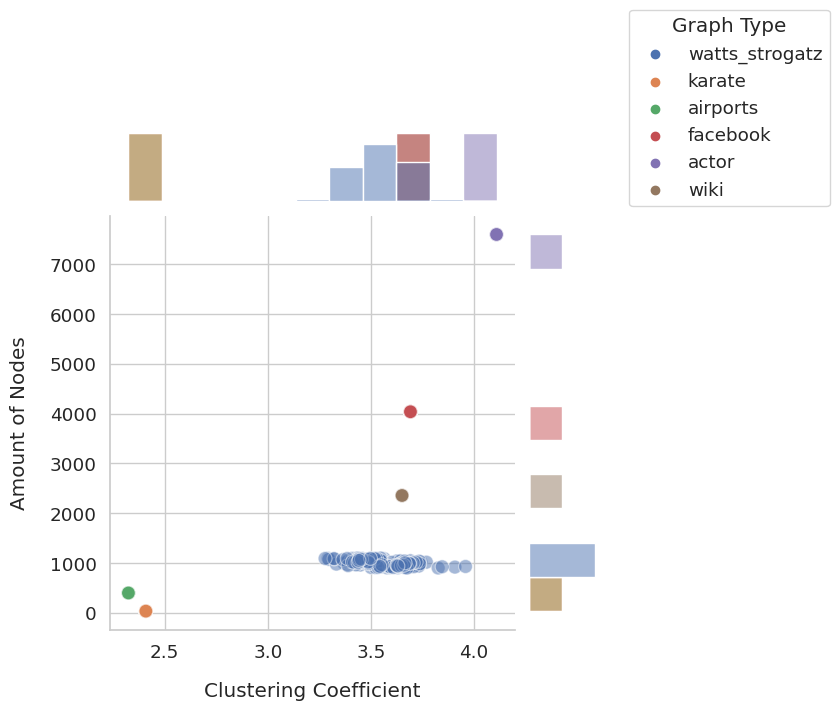

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=rw_metrics, 
    # y="avg_degree_centrality", 
    # x="diameter", 
    x="average_shortest_path_length", 
    y="n_nodes", 
    # y="n_edges", 
    hue="graph_type"
)

g1.plot_joint(sns.scatterplot, s=100, alpha=.5)
g1.plot_marginals(sns.histplot)
# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)

sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3349893/314595499.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


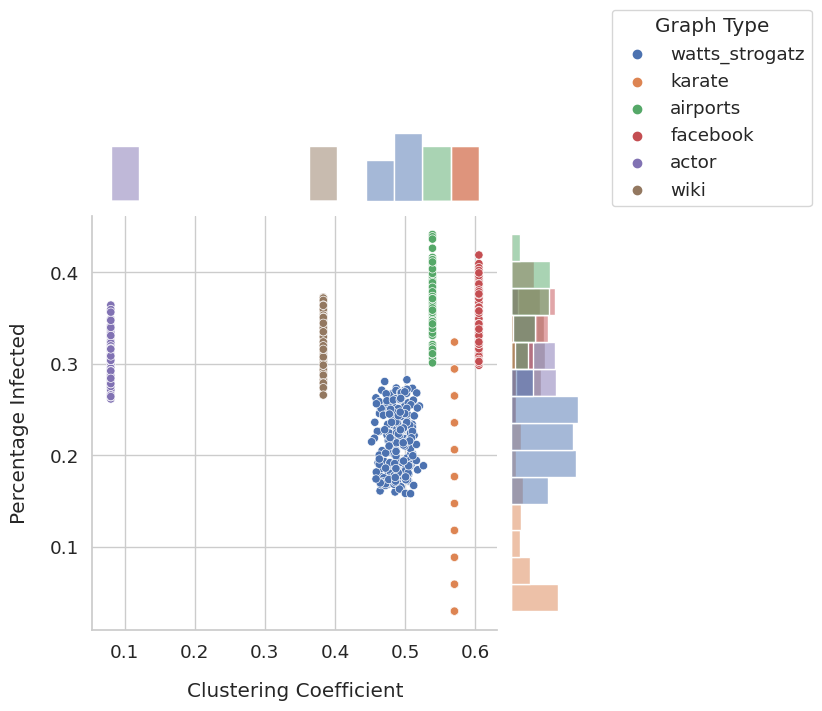

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=rw_metrics, 
    x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    # x="average_shortest_path_length", 
    y="percentages_infected", 
    hue="graph_type",
)
#color dots red
g.plot_joint(sns.scatterplot)
#plot histogram on x-axis
g.plot_marginals(sns.histplot)

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

## Training Data:

In [46]:
# iterate over every data object in the data/training/synthetic/raw folder
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

data_dir = Path("../data/training/synthetic/raw")
data_files = os.listdir(data_dir)
data_files = glob.glob(f"{data_dir}/*.pt")

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    data = torch.load(data_file)
    metrics.append(data.metrics)
    settings.append(data.settings)
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
df_metrics = df_metrics.join(df_settings)

# df_metrics = pd.concat([df_metrics, rw_metrics], axis=0)
df_metrics["percentages_infected"] = df_metrics["currently_infected"] / df_metrics["n_nodes"]
df_metrics


100%|██████████| 1000/1000 [00:00<00:00, 1363.77it/s]


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
0,5,3.529231,0.519410,16.0,1003,8024,0.015968,0,watts_strogatz,16,0.050968,0.006257,0.177356,34,0.014646,199,0.198405
1,6,3.776224,0.509853,14.0,1044,7308,0.013423,1,watts_strogatz,15,0.050820,0.006211,0.244858,49,0.015955,267,0.255747
2,5,3.457541,0.502157,16.0,964,7712,0.016615,2,watts_strogatz,16,0.052962,0.006425,0.224098,40,0.014405,235,0.243776
3,5,3.451024,0.476224,16.0,1063,8504,0.015066,3,watts_strogatz,17,0.059523,0.006433,0.166242,28,0.016874,193,0.181562
4,6,3.578557,0.465167,14.0,979,6853,0.014315,4,watts_strogatz,14,0.064511,0.006297,0.249247,50,0.015349,244,0.249234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,3.610259,0.473245,14.0,978,6846,0.014330,995,watts_strogatz,14,0.061652,0.006564,0.204302,48,0.015230,218,0.222904
996,5,3.481597,0.496082,16.0,1040,8320,0.015399,996,watts_strogatz,16,0.056938,0.006860,0.232055,40,0.017262,257,0.247115
997,5,3.417324,0.469487,16.0,1049,8392,0.015267,997,watts_strogatz,16,0.064213,0.006388,0.249302,38,0.016449,282,0.268827
998,5,3.493520,0.505781,16.0,1001,8008,0.016000,998,watts_strogatz,16,0.052615,0.006700,0.202643,35,0.016810,216,0.215784


In [47]:
print(list(df_metrics.columns))

['diameter', 'average_shortest_path_length', 'average_clustering_coefficient', 'average_degree', 'n_nodes', 'n_edges', 'avg_degree_centrality', 'Unnamed: 0', 'graph_type', 'neighbours', 'prob_reconnect', 'beta', 'threshold_infected', 'iterations', 'percentage_initially_infected', 'currently_infected', 'percentages_infected']


/tmp/ipykernel_3349893/1911407649.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


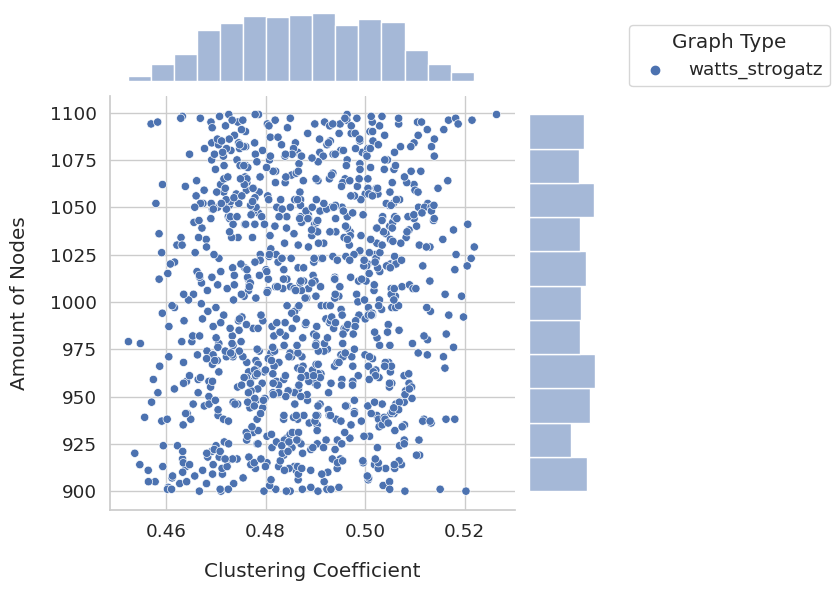

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=df_metrics, 
    # y="avg_degree_centrality", 
    # y="diameter", 
    x="average_clustering_coefficient", 
    y="n_nodes", 
    # y="n_edges", 
    hue="graph_type",
)
g1.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3349893/1746551855.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


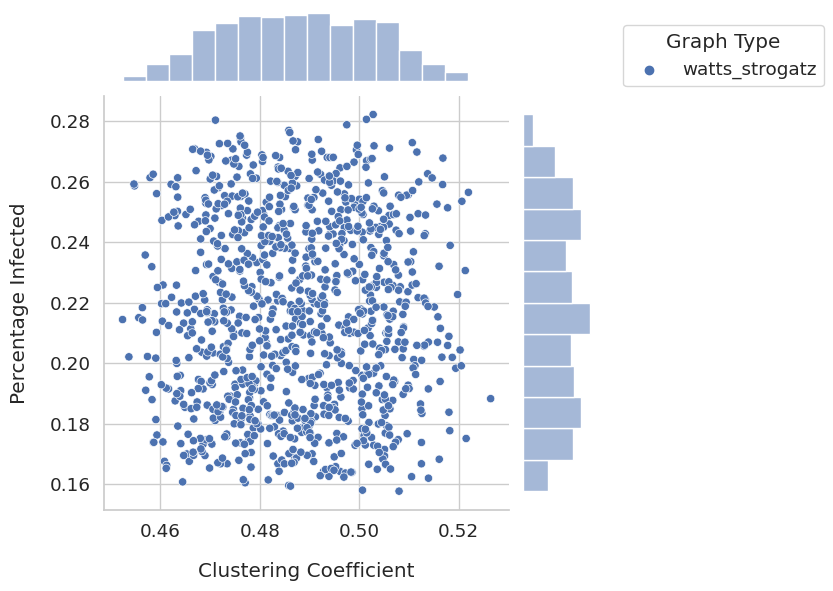

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=df_metrics, 
    x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    y="percentages_infected", 
    hue="graph_type",
)
g.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()